In [259]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [260]:
sourse_data = read_csv('/content/sample_data/airline-passengers.csv')
sourse_data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


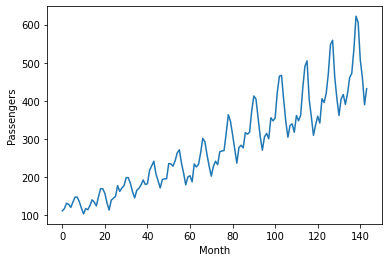

In [261]:
num_passengers = sourse_data.iloc[:,1].values
plt.plot(num_passengers)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [262]:
num_passengers = num_passengers.reshape(-1,1).astype('float32')
num_passengers.shape

(144, 1)

In [263]:
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()
num_passengers = scaler.fit_transform(num_passengers)

In [264]:
#train, test = train_test_split(num_passengers, test_size=0.25)

In [265]:
train_size = int(len(num_passengers)*0.75)
test_size = len(num_passengers) - train_size
train = num_passengers[0:train_size]
test = num_passengers[train_size:len(num_passengers)]

In [266]:
def get_set(sourse_set = None, time_stamp=None):
	X, y = [], []
	for i in range(len(sourse_set)-time_stamp-1):
		X.append(sourse_set[i:(i+time_stamp), 0])
		y.append(sourse_set[i + time_stamp, 0])
	return np.array(X), np.array(y)

In [267]:
time_stamp = 10
X_train, y_train = get_set(train, time_stamp)
X_test, y_test = get_set(test, time_stamp)

In [268]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [269]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stamp)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=70, batch_size=1)

Epoch 1/70
97/97 [==============================] - 2s 2ms/step - loss: 0.0447
Epoch 2/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 3/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 4/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 5/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 7/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 8/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 9/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 10/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 11/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 12/70
97/97 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 13/70
97/97 [==============================

In [270]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

predict_train = scaler.inverse_transform(predict_train)
y_train = scaler.inverse_transform([y_train])
predict_test = scaler.inverse_transform(predict_test)
y_test = scaler.inverse_transform([y_test])

trainScore = math.sqrt(mean_squared_error(y_train[0], predict_train[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], predict_test[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.54 RMSE
Test Score: 38.92 RMSE


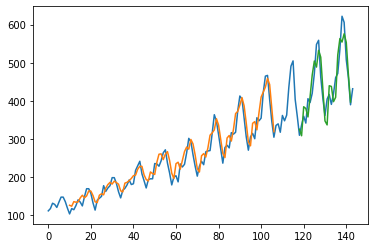

In [271]:
predict_trainPlot = np.empty_like(num_passengers)
predict_trainPlot[:, :] = np.nan
predict_trainPlot[time_stamp:len(predict_train)+time_stamp, :] = predict_train

testPredictPlot = np.empty_like(num_passengers)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(predict_train)+(time_stamp*2)+1:len(num_passengers)-1, :] = predict_test

plt.plot(scaler.inverse_transform(num_passengers))
plt.plot(predict_trainPlot)
plt.plot(testPredictPlot)
plt.show()

Что помогло вам улучшить ее точность? <br> Применение MiMaxScaler в предобработке данных, разбиение трейн/тест "вручную", увеличение числа эпох (>70)   